[View in Colaboratory](https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/Frame_trails.ipynb)

In [0]:
!pip install scikit-video --quiet

In [0]:
!apt-get -qq install ffmpeg

In [0]:
# !ffmpeg -f lavfi -i testsrc=duration=10:size=1280x720:rate=30 testsrc.mpg

In [0]:
from skvideo.io import vread

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np

import skvideo.datasets
import skvideo

# filename = skvideo.datasets.bigbuckbunny()
filename = 'VID_20180930_193148_2.mp4'

In [0]:
video_data = vread(filename)[90:150]

In [12]:
video_data.shape

(60, 1080, 1920, 3)

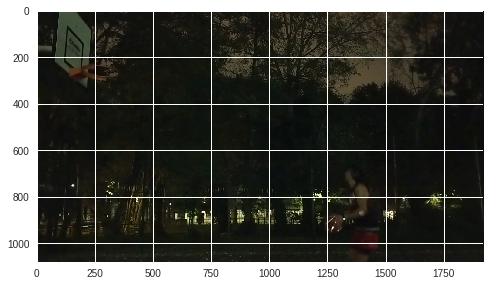

In [13]:
plt.imshow(video_data[0])
plt.show()

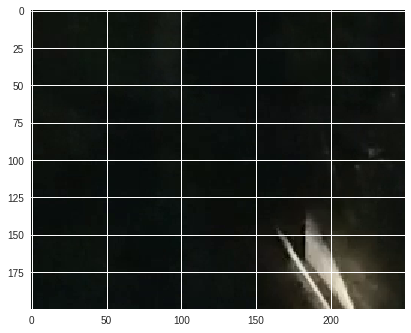

In [16]:
section = video_data[10, 400:600, 1000:1250]
plt.imshow(section)

In [0]:
the_gray = section.mean(axis=0).mean(axis=0)
the_gray

array([61.4969, 66.3629, 84.2985])

In [0]:
pixel = video_data[0,450, 350]
pixel = [200, 200, 180]

In [0]:
pink = np.array([255, 0, 255])

In [19]:
all_pink = np.full(video_data.shape[1:], pink, dtype=np.uint8)
all_pink.shape

(1080, 1920, 3)

In [0]:
def weight_avg_frame(base, top, w=0.5):

  delta_frame = top.astype(np.int16) - base.astype(np.int16) 

  return (base + (delta_frame * w)).astype(np.uint8)

  # stack = np.stack((base, top))

  # lower_frame = np.min(stack, axis=0).astype(np.int16)

  # delta_frame = abs(base.astype(np.int16) - top.astype(np.int16))

  # return (lower_frame + (delta_frame * w)).astype(np.uint8)

In [0]:
TRAIL_LENGTH = 100

new_video = video_data.copy()

trail_time = np.zeros(shape=video_data.shape[1:-1])

trail = np.zeros(shape=video_data.shape[1:-1])
trail.shape

for i, frame in enumerate(video_data):
  new_trail = abs((frame - pixel)).sum(axis=2) < 150
  trail = np.logical_or(trail, new_trail)

  trail_time -= 1
  trail_time[new_trail] = TRAIL_LENGTH
  trail_time = np.clip(trail_time, 0, TRAIL_LENGTH)

  trail_time_3d = np.repeat(trail_time[:, :, np.newaxis], 3, axis=2)
  
  new_video[i][trail] = weight_avg_frame(frame, all_pink, trail_time_3d/TRAIL_LENGTH )[trail]

  # new_video[i][trail] = weight_avg(frame, pink, w=trail_time/100) #((frame + pink)/2)[trail]

  # new_video[i][trail] = ((frame + pink)/2)[trail]


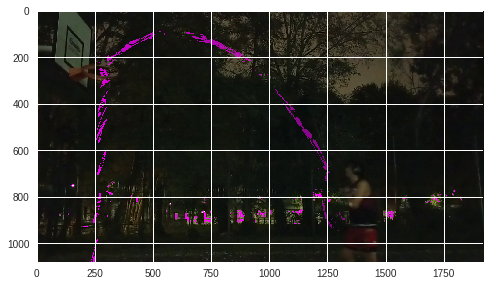

In [31]:
plt.imshow(new_video[-1])

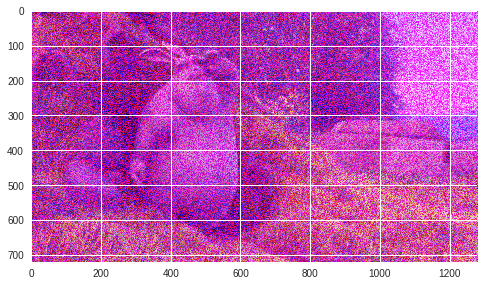

In [0]:
plt.imshow(weight_avg_frame(frame, all_pink, np.random.random([720, 1280, 3])))

In [0]:
skvideo.io.vwrite("trail.mp4", new_video)

In [0]:
import io
import base64
from IPython.display import HTML

In [34]:
video = io.open('trail.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [0]:
new_video[i][trail].shape

(43821, 3)

In [0]:
new_video[10][trail] = frame 

In [0]:
video_data.shape[1:]

(720, 1280, 3)

In [0]:
np.full(video_data.shape[1:], pink)[0,0]

array([255,   0, 255])

In [0]:
np.int32

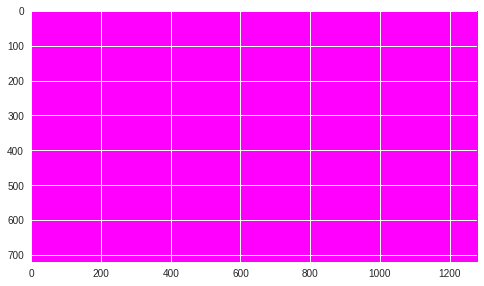

In [0]:
plt.imshow( all_pink)

In [0]:
all_pink

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]]

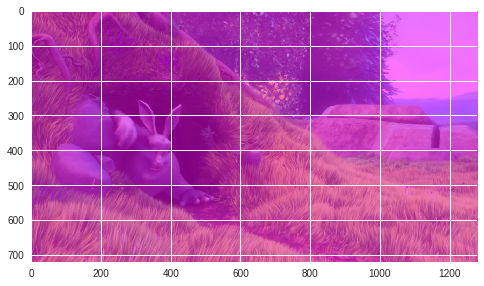

In [0]:
plt.imshow(weight_avg_frame(video_data[1], all_pink, w=0.5))

In [0]:
video_data[1]

array([[[104, 112,  46],
        [ 89,  97,  31],
        [ 83,  92,  21],
        ...,
        [205, 223, 251],
        [205, 223, 251],
        [205, 223, 251]],

       [[102, 110,  44],
        [ 88,  96,  30],
        [ 84,  93,  22],
        ...,
        [205, 223, 251],
        [205, 223, 251],
        [205, 223, 251]],

       [[ 96, 104,  38],
        [ 84,  92,  26],
        [ 88,  97,  26],
        ...,
        [205, 223, 251],
        [205, 223, 251],
        [205, 223, 251]],

       ...,

       [[138, 131,  43],
        [152, 145,  57],
        [161, 153,  70],
        ...,
        [109, 117,  24],
        [116, 135,  27],
        [135, 154,  46]],

       [[151, 145,  54],
        [164, 158,  67],
        [167, 160,  72],
        ...,
        [108, 115,  27],
        [110, 128,  25],
        [131, 149,  46]],

       [[159, 153,  62],
        [165, 159,  68],
        [165, 158,  70],
        ...,
        [114, 121,  33],
        [113, 131,  28],
        [127, 145,  42]]

In [0]:
all_pink

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       ...,

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]]

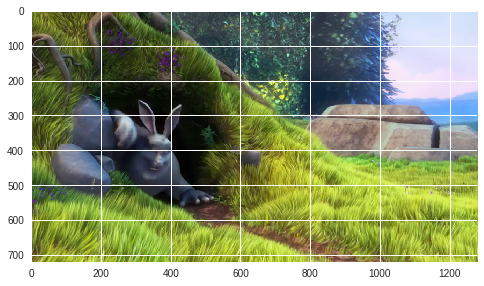

In [0]:
plt.imshow(video_data[1])

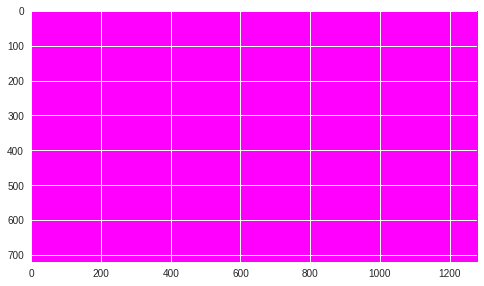

In [0]:
plt.imshow(all_pink)

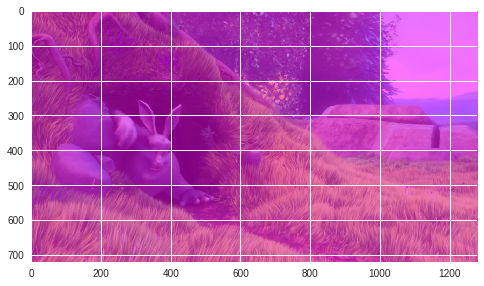

In [0]:
plt.imshow(((video_data[1].astype(np.uint16) + all_pink.astype(np.uint16))/2).astype(np.uint8) )

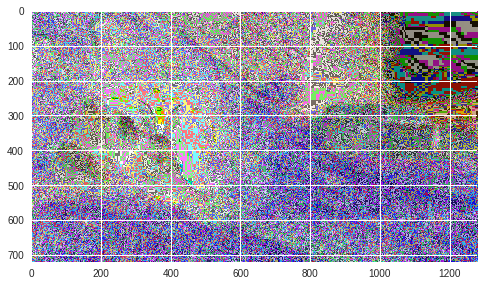

In [0]:
plt.imshow((video_data[1]+all_pink)/2)

In [0]:
weight_avg_frame(np.array([1,5,1,1]), np.array([10,5,10,1]),1)

array([10,  5, 10,  1])

In [0]:
np.stack((video_data[1], all_pink)).shape

(2, 720, 1280, 3)

In [0]:
lower_frame = np.min(np.stack((video_data[1], all_pink)), axis=0)
lower_frame.shape

(720, 1280, 3)

In [0]:
delta_frame = abs(video_data[1] - all_pink)
delta_frame.shape

(720, 1280, 3)

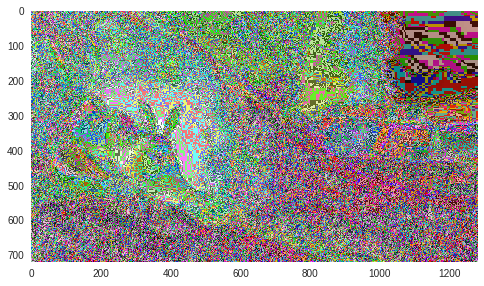

In [0]:
plt.imshow( lower_frame + (delta_frame * 0.5))
plt.grid(False)

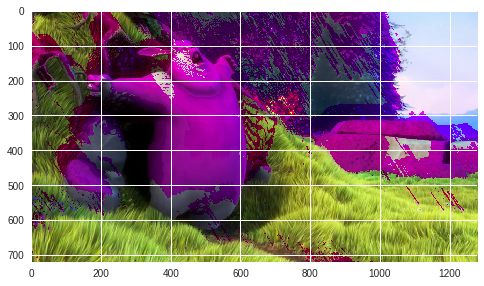

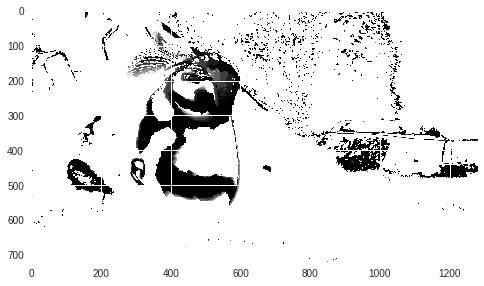

In [0]:
plt.imshow(new_video[100])
plt.show()
plt.imshow(trail_time)
plt.show()

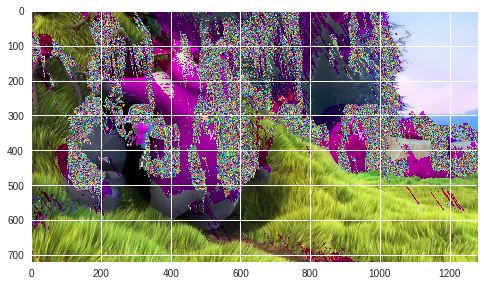

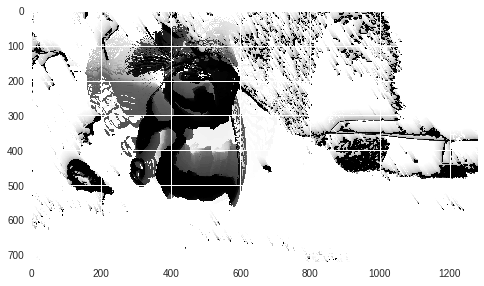

In [0]:
plt.imshow(new_video[100])
plt.show()
plt.imshow(trail_time)
plt.show()

In [0]:
new_video[100]

array([[[118, 109, 101],
        [118, 109, 101],
        [117, 108, 100],
        ...,
        [192, 218, 253],
        [192, 218, 253],
        [192, 218, 253]],

       [[118, 109, 101],
        [118, 109, 101],
        [118, 109, 101],
        ...,
        [192, 218, 253],
        [192, 218, 253],
        [192, 218, 253]],

       [[117, 108, 100],
        [117, 108, 100],
        [118, 109, 101],
        ...,
        [192, 218, 253],
        [192, 218, 253],
        [192, 218, 253]],

       ...,

       [[ 80,  77,  26],
        [ 80,  77,  26],
        [ 81,  78,  27],
        ...,
        [133, 154,  32],
        [128, 149,  27],
        [147, 168,  46]],

       [[ 77,  76,  22],
        [ 77,  76,  22],
        [ 78,  77,  23],
        ...,
        [136, 157,  35],
        [128, 149,  27],
        [143, 164,  42]],

       [[ 74,  73,  19],
        [ 74,  73,  19],
        [ 74,  73,  19],
        ...,
        [138, 159,  37],
        [127, 148,  26],
        [141, 162,  40]]

In [0]:
skvideo.io.vwrite("trail.mp4", new_video, outputdict={'-vcodec': 'libx264'})

In [0]:
mask = abs((video_data[0] - pixel)).sum(axis=2) < 150

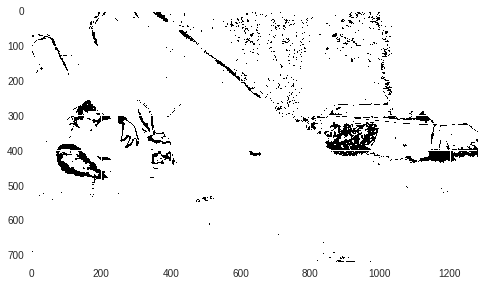

In [0]:
plt.imshow(mask)